<a href="https://colab.research.google.com/github/pnir7/510Programming-For-Digital-And-Physical-User-Interfaces/blob/week_2/Lab_2_DATA_VISUALIZATION_%26_PROCESSING_IN_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB2: DATA VISUALIZATION & PROCESSING IN PYTHON
In this lab you will practice Python data processing and visualization.


## Step 1: Access the datasets

You can access the data files for `Lab_2` on Canvas in the `Files/Lab 2` section of *TECHIN 510*, and then upload them to your local Jupyter server.
* Robot Faces data set
* People
* Pre-recorded accelerometer data

And you can incorporate them into your code using the sample code in the next cell.


In [ ]:
## SAMPLE CODE
import pandas as pd
f1 = 'robot_faces.csv'
f2 = 'people.csv'
f3 = 'accelerometer.csv'
faces = pd.read_csv(f1)
people = pd.read_csv(f2)
accel = pd.read_csv(f3)

## Step 2: Robot face data exploration

Let's start by exploring the data in `robot_faces.csv`. First, write the code for loading and preprocessing the data. After inspecting the different column names to better understand what the data includes, pose a specific question and write new code to answer that question. Some example questions are:
* How many robots both have a mouth and a nose?
* Which country has the highest fraction of robots with black face color?
* Do more robots built after 2012 have blue eyes than those built before?

Your code should print the question at the beginning and print the computed answer at the end. Your script should also create at least one visualization that allows a human to answer the same question without having to do calculations.

*If you are interested, you can read more about the face data [here](https://spectrum.ieee.org/automaton/robotics/humanoids/what-people-see-in-157-robot-faces).* 


Index(['Name', 'Unnamed: 1', 'robot type', 'category', 'full head',
       'screen type', 'mouth', 'nose', 'eyebrows', 'cheeks (blush)', 'hair',
       'ears', 'physical features', 'robot height', 'embodiment', 'face color',
       'face turns other colors', 'face gradient to', 'face shape',
       'screen size', 'head motion', 'face motion', 'info display',
       'eye color', 'eye outline color', 'eye turns other colors (inside)',
       'eye shape', 'eye turns other shapes (exclude blink)', 'pupil (y/n)',
       'pupil color', 'lid', 'lid color', 'iris', 'iris color', 'lashes color',
       'lash shape', 'reflected glare color', '# glare circles', 'blink type',
       'pupil\nshapes', 'eye motion', 'pupil and/or\niris motion',
       'glare motion', 'wink', 'eye size', 'eye placement', 'eye spacing',
       'mouth color (or outline color)', 'mouth inside color', 'mouth shape',
       'lips', 'tongue', 'teeth shape', 'mouth motion', 'mouth length',
       'mouth placement', 'nose col

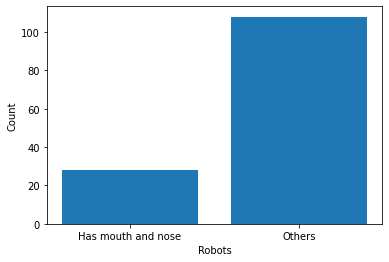

In [ ]:
## TODO: Write code to ask a question about the face data and answer it both visually and programmatically

import matplotlib.pyplot as plt

# Load and preprocess the data
data = faces

# Print column names to better understand the data
print(data.columns)

# Specific question: How many robots both have a mouth and a nose?
print("How many robots both have a mouth and a nose?")

# Code to answer the question
mouth = data['mouth'] == 'y'
nose = data['nose'] == 'y'
mouth_and_nose = data[(data['mouth'] == 'y') & (data['nose'] == 'y')]
num_robots = len(mouth_and_nose)
print("Number of robots with both a mouth and a nose: ", num_robots)
print("Number of robots with a mouth: ", len(mouth))
print("Number of robots with a nose: ", len(nose))

# Visualization
plt.bar(['Has mouth and nose', 'Others'], [len(mouth_and_nose), len(data) - len(mouth_and_nose)])
plt.xlabel('Robots')
plt.ylabel('Count')
plt.show()



## Step 3: Persons data exploration

We continue our exploration of the data by diving into a dataset of notional (100% fake) persons. Just as you did with the Robot data, write the code for loading and preprocessing the Person data. After inspecting the different column names to better understand what the data includes, pose a specific question and write new code to answer that question. Some example questions are:
* How many males are in the data set vs females?
* Who are the oldest people living in Chicago?
* Which city is most popular with people in their 30's?
* What are the top 5 US states represented in the data?

Your code should print the question at the beginning and print the computed answer at the end. Your script should also create at least one visualization that allows a human to answer the same question without having to do calculations.

Index(['FirstName', 'Surname', 'Occupation', 'Age', 'Birthday',
       'StreetAddress', 'City', 'ZipCode', 'EmailAddress', 'Gender', 'name'],
      dtype='object')
Who are the top 3 oldest people living in Chicago?
The top 3 oldest people living in Chicago are:
     FirstName  Surname  Age
1349      John  Uriarte   82
1738     Brian     Hill   81
2666     Karen  Leonard   79


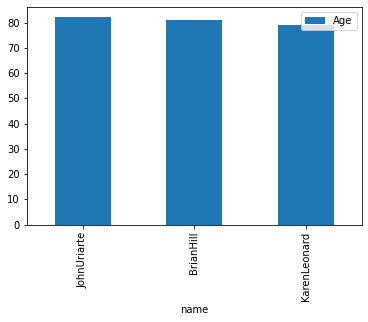

In [ ]:
## TODO: Write code to ask a question about the person data and answer it both visually and programmatically


# Load and preprocess the data
data = people

# Print column names to better understand the data
print(data.columns)

# Specific question: Who are the oldest people living in Chicago?
print("Who are the top 3 oldest people living in Chicago?")

# Code to answer the question
chicago_residents = data[data['City'] == 'Chicago']
oldest_residents = chicago_residents.nlargest(3, 'Age')
print("The top 3 oldest people living in Chicago are:")
print(oldest_residents[['FirstName','Surname', 'Age']])

# Visualization
people['name'] = people['FirstName'] + people['Surname']
oldest_residents.plot(kind='bar', x='name', y='Age')
plt.show()



## Step 4: Load and visualize accelerometer data

Next you will explore the accelerometer data in `accelerometer.csv` recorded from a mobile device. 

The first thing your Python script should do is open the data file and parse its content into Python lists or arrays. Each row in the data file corresponds to one reading. The first value is the time in seconds, and the next three values are the x, y, z acceleration values from a mobile device accelerometer. Your goal for this part of the lab is to obtain four lists or arrays (of same length) each containing the different columns in the data file.

You can use the `pd.read_csv()`, but if you would like to practice some of the string operations we used during the `chatbot` exercise last week, you can open the file, read its content into a single string, and then use the split() function to split into lines (`data_string.split("\n")`) and elements (`data_string.split(",")`).

Before starting to process the data, visualize it to get a better sense of what is in the data. Keep visualization steps in your script for your lab submission.

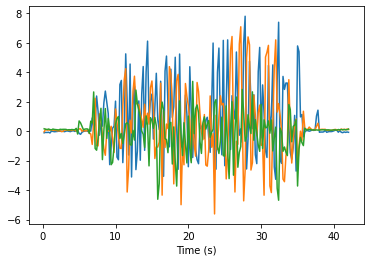

In [ ]:
## TODO: Code for loading and visualizing accelerometer data

# Load and preprocess the data
with open('accelerometer.csv') as file:
    data_string = file.read()
lines = data_string.split("\n")
data_list = [line.split(",") for line in lines]

# data = accel
# print(data.columns)

# Access the different columns
accel.columns = ['time', 'x_acc', 'y_acc', 'z_acc']
time = data['time']
x_acceleration = data['x_acc']
y_acceleration = data['y_acc']
z_acceleration = data['z_acc']

# Visualization
# plt.plot(time, x_acceleration, time, y_acceleration, time, z_acceleration)
# plt.xlabel("Time (s)")
# plt.ylabel("XYZ Acceleration (m/s^2)")
# plt.show()

plt.plot(time, x_acceleration, label='x_acc')
plt.plot(time, y_acceleration, label='y_acc')
plt.plot(time, z_acceleration, label='z_acc')
plt.xlabel('Time (s)')
plt.show()












## Step 5: Detecting lack of movement

As a first data processing exercise, iterate over the lists or arrays you created to compute the: 1) total amount of time; and 2) percentage of time during which the person holding the mobile device was not moving (e.g., absolute acceleration smaller than ~0.2m/sec^2). Visualize parts of the data where lack of movement is detected together with the original data to verify that it works correctly.

     time     x_acc     y_acc     z_acc
0     0.2 -0.113283 -0.038241  0.161607
1     0.4 -0.083617  0.123633  0.129044
2     0.6 -0.091717  0.076735  0.106521
3     0.8 -0.076508  0.070919  0.144249
4     1.0 -0.124198  0.070676  0.106483
..    ...       ...       ...       ...
205  41.2 -0.103875  0.103546  0.089788
206  41.4 -0.053300  0.119761  0.112836
207  41.6 -0.084279  0.102456  0.094130
208  41.8 -0.056570  0.139751  0.098174
209  42.0 -0.077909  0.111883  0.143682

[210 rows x 4 columns]
41.800000000000054
Percentage of time during which the device was not moving: 16.75%


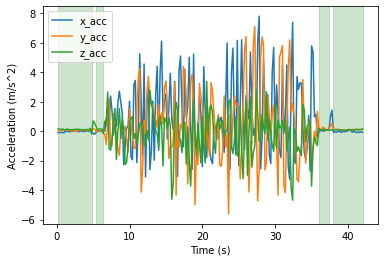

In [ ]:
## TODO: Code for detecting lack of movement (will be run after running code from Step 3)

# Load and preprocess the data
data = accel
accel.columns = ['time', 'x_acc', 'y_acc', 'z_acc']
print(accel)
# accel.sort_values(by=['time'], ascending = True)

# Creating the lists
time = data['time']
x_acc = data['x_acc']
y_acc = data['y_acc']
z_acc = data['z_acc']

# Calculating the total amount of time

total_time = time.max() - time.min()
print(total_time)
# Threshold for detecting lack of movement
threshold = 0.5

# Initialize variables to store the start and end times of lack of movement
start_time = None
end_time = None

# Initialize variable to store the total duration of lack of movement
duration = 0
periods = []

for i in range(len(time)):
    acceleration = (x_acc[i]**2 + y_acc[i]**2 + z_acc[i]**2)**0.5
    if acceleration < threshold:
        if start_time is None:
            start_time = time[i]
        end_time = time[i]
    elif start_time is not None:
        periods.append([start_time, end_time])
        duration = duration + end_time - start_time
        start_time = None
        end_time = None
  
# Check if the last period continues until the end of the data
if start_time is not None:
    periods.append([start_time, time[len(time)-1]])

# Calculate percentage of time during which the device was not moving
percent_not_moving = (duration / total_time) * 100
print("Percentage of time during which the device was not moving: {:.2f}%".format(percent_not_moving))

# Visualization
plt.plot(time, x_acc, label='x_acc')
plt.plot(time, y_acc, label='y_acc')
plt.plot(time, z_acc, label='z_acc')

for period in periods:
    plt.axvspan(period[0], period[1], color='green', alpha=0.2)

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()


## Step 6: Counting steps

Next you will iterate over the data to count how many steps were taken. There are alternative ways to do that but here we will outline an approximation of the "zero-crossing" method. Walking with an accelerometer results in cyclic patterns characterized by pairs of peaks and valleys in acceleration in some directions. In the provided data you can focus on the z dimension, since the mobile device was held in fixed orientation. To determine the peaks and valleys, iterate over the z values; compare each element in the list to the value of the previous and the next element (note that you cannot do this for the first and last elements of the list); if it is greater than or smaller than both of those, it corresponds to a peak or a valley. Create a separate list, of same length as the data lists, that has the value +1 where peaks occur, -1 where valleys occur, and 0 otherwise. Visualize the peaks and the valleys on the same plot as your data to verify that your algorithm works correctly.

You will see that even very small variations in acceleration cause peaks and valleys, so we need to be stricter in detecting peaks and valleys that correspond to an actual step. For that, you can extend the condition for peaks and valleys to include a threshold on the absolute value (`math.fabs()`) of the acceleration in the z direction (e.g., ~1m/sec^2). Visually inspect the number of peaks and valleys with this stricter criteria. 

A rough approximation of the number of steps would be the `math.min()` of the numbers of peaks and number of valleys. If you are out of time for this lab, you can stop here. However, to count pairs of peaks and valleys more strictly, you need to iterate over the list of peaks and valleys to determine the number of times a peak is followed by a valley (or vice versa) within one second or so (i.e., -1 and 1 separated by no more than four 0s in the peak/valley list). So if you have time, implement counting of pairs as a more accurate approximation of the number of steps. 

Your script should print the counted number of steps on the terminal at the end.

Number of steps:  10


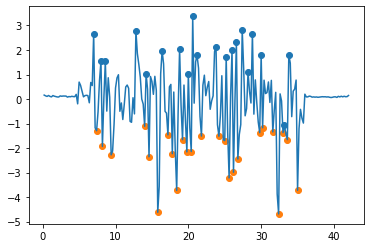

In [ ]:
## TODO: Code for counting steps in accelerometer data (will be run after Step 4)
import math

# Threshold for detecting peaks and valleys
threshold = 1

peaks = []
valleys = []
steps = []

# Threshold for detecting peaks and valleys
threshold = 1

# Iterate over the data to find the peaks and valleys
for i in range(1, len(z_acc) - 1):
    if z_acc[i] > z_acc[i-1] and z_acc[i] > z_acc[i+1] and math.fabs(z_acc[i]) > threshold:
        peaks.append(time[i])
    elif z_acc[i] < z_acc[i-1] and z_acc[i] < z_acc[i+1] and math.fabs(z_acc[i]) > threshold:
        valleys.append(time[i])

# Iterate over the peaks and valleys to find the number of steps
for i in range(len(peaks) - 1):
    if peaks[i + 1] - peaks[i] < 1:
        steps.append(peaks[i])

# Print the number of steps
print("Number of steps: ", len(steps))

# Visualization
plt.plot(time, z_acc, label='z_acc')
plt.scatter(peaks, [z_acc[i] for i in range(len(z_acc)) if time[i] in peaks], label='peaks')
plt.scatter(valleys, [z_acc[i] for i in range(len(z_acc)) if time[i] in valleys], label='valley')
plt.show()

## Bonus

If you have extra time on this lab, go over your code and add error checks for things that might go wrong, such as if the data file does not have the expected format or if an operation returns empty lists. Instead of throwing errors in these situations, your script should print informative error messages (remember `try`/`except` clauses). In addition, you can go over your code to refactor it into potentially re-usable functions. Finally, you can use the ipywidgets we covered in class to make your figures interactive. Do this part on the code above and list all the improments you made in the text here.

## Step 7: Submit your code on Canvas

Complete this lab by submitting this file (`lab2.ipynb`) on Canvas, by January 24, 23:59. We will test your code by manually running them and inspecting the code to verify that:
* Your face data analysis prints out a clearly stated question and the answer to the question onto the terminal. The code for computing the answer correctly represents the intended question. It also creates an interpretable visualization of parts of the data that would allow a person to answer the same question.
* Your step counter code visualizes the accelerometer data, clearly showing times where there is no movement and where peaks and valleys are detected by your algorithm. It prints the detected number of steps on the terminal at the end. The detected number is reasonable compared to ground truth and the code corresponds to the described algorithm.

See Canvas for a grading rubric.